In [1]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("1000_Companies.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [2]:
# Bias term
# It is optional.
# Since the bias term is 1, It doesnot affect while multiplying with other data and acts like thetanot or c.
df = pd.concat([pd.Series(1,index=df.index,name='Bias0'),df],axis=1)
df.head()

,Bias0,R&D Spend,Administration,Marketing Spend,Profit
0,1,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,1,153441.51,101145.55,407934.54,191050.39
3,1,144372.41,118671.85,383199.62,182901.99
4,1,142107.34,91391.77,366168.42,166187.94


In [3]:
# Dividing input and output

X = df.iloc[:,:4] #First four columns
# (OR) X = df.drop(columns=['Profit'])
y = df.iloc[:,-1] #Profit column


In [4]:
# Normalization
# Only inputs are normalized
# Bringing data on same scale
for i in range(0,len(X.columns)):
    X.iloc[:,i] = X.iloc[:,i]/np.max(X.iloc[:,i])

# It is equivalent to:
# X['R&D Spend'] = X['R&D Spend']/np.max(X['R&D Spend'])
# X['Administration'] = X['Administration']/np.max(X['Administration'])
# X['Marketing Spend'] = X['Marketing Spend']/np.max(X['Marketing Spend'])

# X.iloc[:,0] => Gives first column 
# X is now fully normalized.
X 

,Bias0,R&D Spend,Administration,Marketing Spend
0,1.0,1.000000,0.749527,1.000000
1,1.0,0.983359,0.828805,0.940893
2,1.0,0.927985,0.553781,0.864664
3,1.0,0.873136,0.649738,0.812235
4,1.0,0.859438,0.500378,0.776136
...,...,...,...,...
992,1.0,0.635788,0.689766,0.575733
993,1.0,0.283025,0.642602,0.337179
994,1.0,0.587901,0.683364,0.543350
995,1.0,0.327398,0.648535,0.367186


In [5]:
# Initialize theta value
# They could be any values because they are soon to be optimized.
theta = np.array([0]*len(X.columns))
theta

array([0, 0, 0, 0])

In [6]:
# Length of the entire dataframe.
m =len(df)
m

997

In [7]:
# hypothesis function (Prediction or y-hat)

def hypothesis(theta,X):
    return theta*X

In [8]:
# Computing cost
def computeCost(X, y, theta):
    y1 = hypothesis(theta,X)
    y1 = np.sum(y1, axis='columns')
    return np.sqrt(np.sum((y1-y)**2)/(2*m)) 

In [9]:
# Optimizing data with gradient descent function
def gradientDescent(X, y, theta, alpha, it):
    J = []
    for i in range(0,it):
        y1 = hypothesis(theta,X)
        y1 = np.sum(y1, axis='columns')
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/m)
        j = computeCost(X, y, theta)
        J.append(j)
    return J, j, theta



In [10]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 10000)

In [11]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

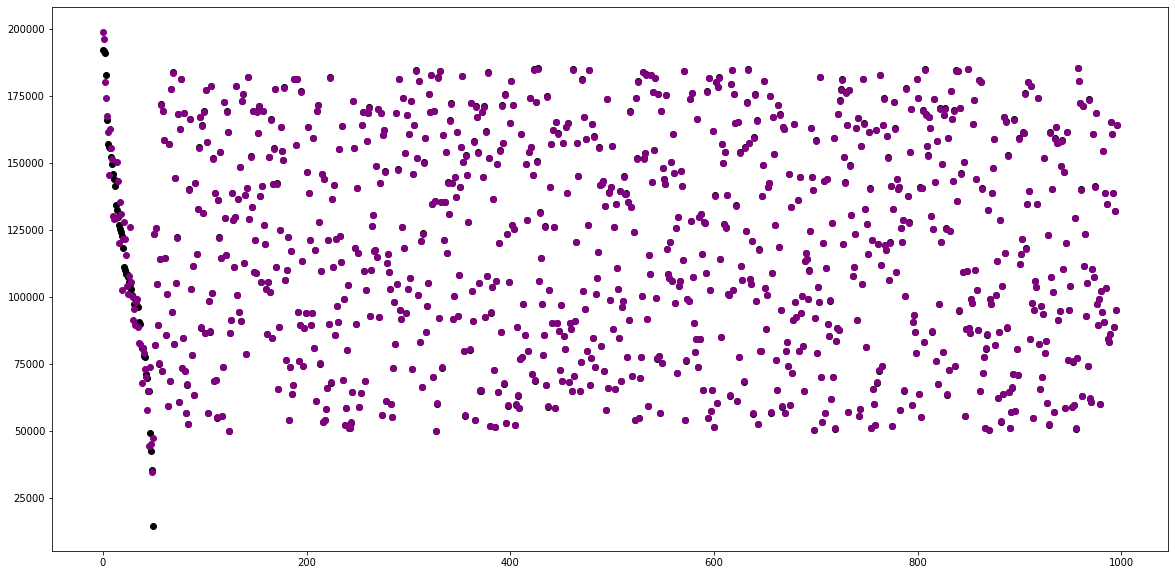

In [12]:
# Plotting the values of y anf y_hat
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(x=list(range(0, 997)),y= y, color='black')         
plt.scatter(x=list(range(0, 997)), y=y_hat, color='purple')
plt.show()
# Model is so accurate that most point almost overlap.

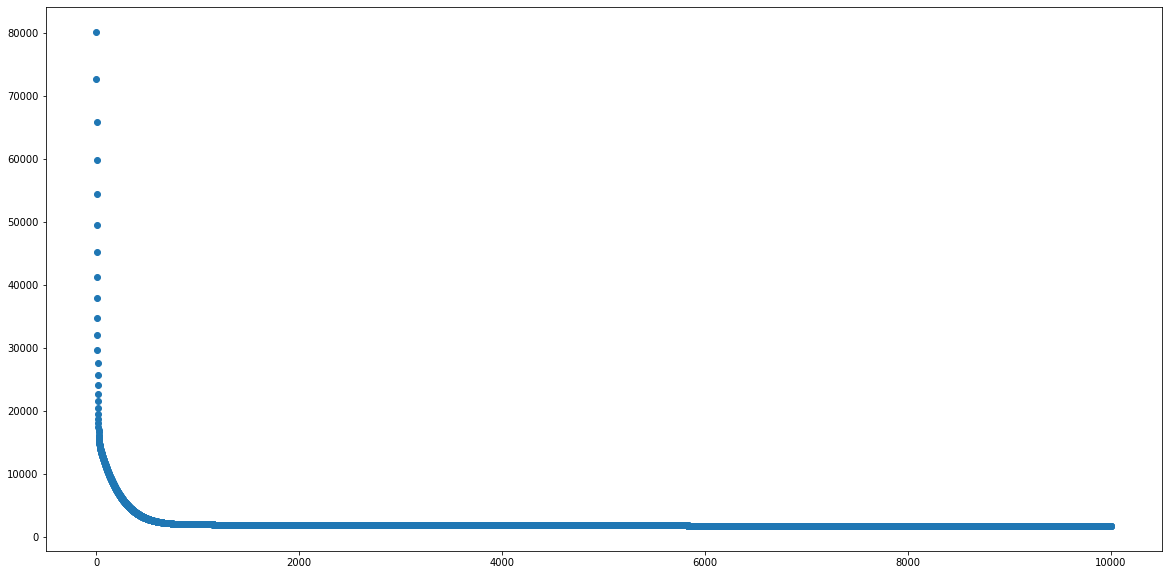

In [13]:
# This is the graph of cost function
plt.figure(figsize=(20,10))
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()

In [14]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat)

5972624.156665298

In [15]:
# Checking the accuracy of the model a.k.a r squared.
from sklearn.metrics import r2_score

r2_score(y,y_hat)
# Model is 99.62 percent accurate. :)

0.996223517399329